# Calculating Betas Using Pandas DataFrames

## 1. Import Libraries and Dependencies

In [23]:
# Import necessary libraries and dependencies
import pandas as pd
from pathlib import Path
import seaborn as sns

## 2. Create a Path to the File Using Pathlib.

In [24]:
# Set the file paths for the CSVs using the Path class from the pathlib library
msft_filepath = Path('../Resources/MSFT.csv')
sp500_filepath = Path('../Resources/SP500.csv')

## 3. Read the CSV into a Pandas DataFrame.

In [25]:
# Read the daily closing prices of MSFT, set the `date` as a datetime index
msft_df = pd.read_csv(msft_filepath,index_col='date',parse_dates=True,infer_datetime_format=True)
sp500_df = pd.read_csv(sp500_filepath,index_col='date',parse_dates=True,infer_datetime_format=True)

## 4. Combine DataFrames and Sort the Index

In [26]:
# Use the concat function to combine the DataFrames by column and perform an inner join. 
combined_df = pd.concat([msft_df,sp500_df],axis='columns',join='inner')

# Sort datetime index in ascending order (past to present)
combined_df.sort_index(inplace=True)

# Display a few rows
combined_df.head()

,close,volume,open,high,low,close
date,,,,,,
2014-05-20,39.68,21318920,39.68,39.94,39.4600,1872.829956
2014-05-21,40.35,22377460,39.80,40.35,39.7399,1888.030029
2014-05-22,40.10,20201010,40.29,40.35,39.8500,1892.489990
2014-05-23,40.12,18013300,40.37,40.37,40.0000,1900.530029
2014-05-27,40.19,26160450,40.26,40.26,39.8100,1911.910034


## 5. Drop Extraneous Columns

In [27]:
# Drop extra columns and only leave the close columns and associated values
combined_df.drop(['volume','open','high','low'],axis='columns',inplace=True)
combined_df.head()

,close,close
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 6. Rename Columns

In [28]:
# Rename the columns to match the corresponding stock
combined_df.columns = ['MSFT','SP500']
combined_df.head()

,MSFT,SP500
date,,
2014-05-20,39.68,1872.829956
2014-05-21,40.35,1888.030029
2014-05-22,40.10,1892.489990
2014-05-23,40.12,1900.530029
2014-05-27,40.19,1911.910034


## 7. Calculate Daily Returns

In [29]:
# Use the `pct_change` function to calculate daily returns of closing prices for each column
returns_df = combined_df.pct_change()
returns_df.head()

,MSFT,SP500
date,,
2014-05-20,NaN,NaN
2014-05-21,0.016885,0.008116
2014-05-22,-0.006196,0.002362
2014-05-23,0.000499,0.004248
2014-05-27,0.001745,0.005988


## 8. Calculate Covariance of MSFT returns vs. S&P 500 returns

In [30]:
# Calculate covariance of all daily returns of MSFT vs. S&P 500
covariance = returns_df['MSFT'].cov(returns_df['SP500'])

## 9. Calculate Variance of SP500 Returns

In [31]:
# Calculate variance of the S&P 500
sp500_var = returns_df['SP500'].var()

## 10. Calculate Beta of MSFT

In [33]:
# Calculate beta of all daily returns of MSFT
beta = covariance / sp500_var
display(beta)

1.2921208121755678

## 11. Calculate 30-Day Rolling Covariance of MSFT Returns vs. S&P 500 Returns

<Axes: xlabel='date'>

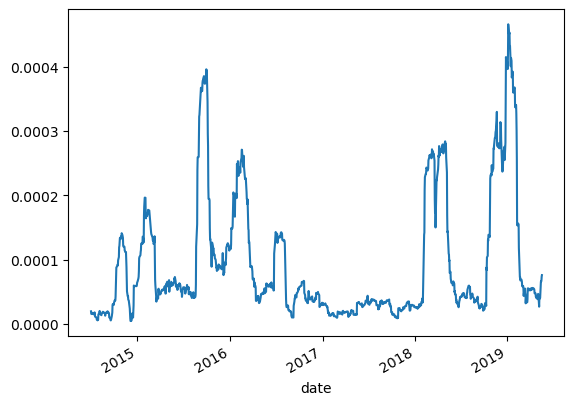

In [35]:
# Calculate 30-day rolling covariance of MSFT vs. S&P 500 and plot the data
rolling_30_cov = returns_df['MSFT'].rolling(30).cov(returns_df['SP500'])
rolling_30_cov.plot()

## 12. Calculate 30-Day Rolling Variance of S&P 500 Returns

<Axes: xlabel='date'>

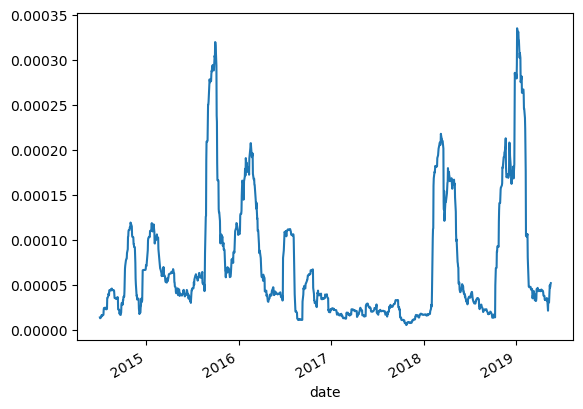

In [36]:
# Calculate 30-day rolling variance of MSFT vs. S&P 500 and plot the data
rolling_30_sp500_var = returns_df['SP500'].rolling(30).var()
rolling_30_sp500_var.plot()

## 13. Calculate 30-Day Rolling Beta of MSFT

<Axes: xlabel='date'>

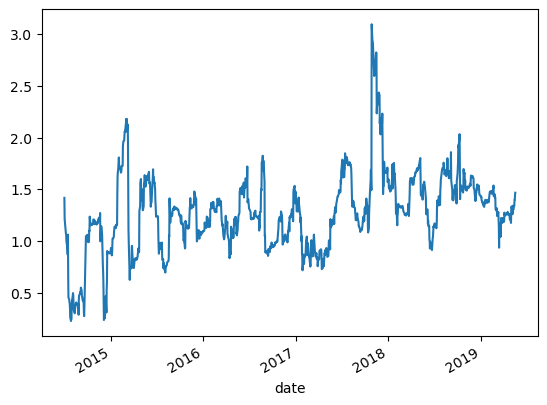

In [37]:
# Calculate 30-day rolling beta of MSFT and plot the data
rolling_30_beta = rolling_30_cov / rolling_30_sp500_var
rolling_30_beta.plot()

## 14. Beta vs. Correlation

<Axes: xlabel='SP500', ylabel='MSFT'>

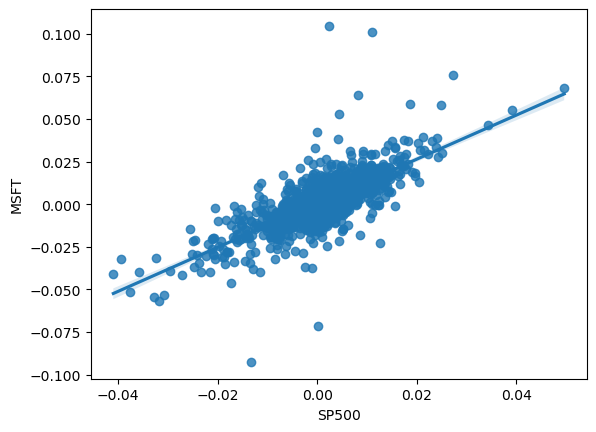

In [43]:
# Showcase beta vs. correlation by plotting a scatterplot using the seaborn library and fitting a regression line
sns.regplot(returns_df,x='SP500',y='MSFT')